## Importing required Libraries

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams["figure.figsize"] = (20,8)  ##Setting the figure size 
import seaborn as sns

from scipy.stats import norm

import warnings 
warnings.filterwarnings('ignore')

## Loading the dataset

In [2]:
retail = pd.read_excel(r'C:\Users\DELL\OneDrive\Documents\Online Retail.xlsx')

In [3]:
retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
df = retail.copy()
df.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
df.shape

(541909, 8)

In [7]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [8]:
df['Amount']= df['Quantity']*df['UnitPrice']
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [9]:
from datetime import date, datetime , timedelta

In [10]:
df['InvoiceDate_year'] = df['InvoiceDate'].dt.year
df['InvoiceDate_month']= df['InvoiceDate'].dt.month
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,InvoiceDate_year,InvoiceDate_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


In [11]:
print(df['CustomerID'].nunique())
print(df['StockCode'].nunique())
print(df['Description'].nunique())

4372
4070
4223


## Dropping columns with quantity and price values in negative

In [12]:
mask = (df['Quantity'] >= 0) & (df['UnitPrice'] > 0)
df = df[mask]
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,InvoiceDate_year,InvoiceDate_month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France,10.20,2011,12
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France,12.60,2011,12
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France,16.60,2011,12


In [13]:
df.shape

(530104, 11)

In [14]:
df=df[(df['CustomerID'].isnull()==False)]
df.shape
     

(397884, 11)

In [15]:
numerical_col=['CustomerID','Quantity','UnitPrice','Amount']

In [16]:
numeric_df=df[numerical_col]

In [17]:
numeric_df.dropna()

,CustomerID,Quantity,UnitPrice,Amount
0,17850.0,6,2.55,15.30
1,17850.0,6,3.39,20.34
2,17850.0,8,2.75,22.00
3,17850.0,6,3.39,20.34
4,17850.0,6,3.39,20.34
...,...,...,...,...
541904,12680.0,12,0.85,10.20
541905,12680.0,6,2.10,12.60
541906,12680.0,4,4.15,16.60
541907,12680.0,4,4.15,16.60


In [18]:
agg = numeric_df.groupby('CustomerID').agg(['count', 'mean', 'max', 'min', 'sum']).reset_index()

In [19]:
agg.columns = ['CustomerID','Quantity_count','Quantity_mean','Quantity_max','Quantity_min','Quantity_sum',
                             'Price_count', 'Price_mean', 'Price_max', 'Price_min', 'Price_sum',
                             'amount_count', 'amount_mean', 'amount_max', 'amount_min', 'amount_sum']

In [20]:
#CustomerID wise aggregate to analyze customer both revenue and quantity wise
agg
     

,CustomerID,Quantity_count,Quantity_mean,Quantity_max,Quantity_min,Quantity_sum,Price_count,Price_mean,Price_max,Price_min,Price_sum,amount_count,amount_mean,amount_max,amount_min,amount_sum
0,12346.0,1,74215.000000,74215,74215,74215,1,1.040000,1.04,1.04,1.04,1,77183.600000,77183.60,77183.60,77183.60
1,12347.0,182,13.505495,240,2,2458,182,2.644011,12.75,0.25,481.21,182,23.681319,249.60,5.04,4310.00
2,12348.0,31,75.516129,144,1,2341,31,5.764839,40.00,0.29,178.71,31,57.975484,240.00,13.20,1797.24
3,12349.0,73,8.643836,36,1,631,73,8.289041,300.00,0.42,605.10,73,24.076027,300.00,6.64,1757.55
4,12350.0,17,11.588235,24,1,197,17,3.841176,40.00,0.85,65.30,17,19.670588,40.00,8.50,334.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,18280.0,10,4.500000,8,2,45,10,4.765000,9.95,2.55,47.65,10,18.060000,23.70,14.85,180.60
4334,18281.0,7,7.714286,12,1,54,7,5.622857,16.95,0.42,39.36,7,11.545714,16.95,5.04,80.82
4335,18282.0,12,8.583333,48,1,103,12,5.199167,12.75,0.29,62.39,12,14.837500,25.50,5.04,178.05
4336,18283.0,756,1.847884,13,1,1397,756,1.614987,15.95,0.29,1220.93,756,2.771005,20.80,0.29,2094.88


In [21]:
agg.drop(['Price_count','amount_count'],axis=1)

,CustomerID,Quantity_count,Quantity_mean,Quantity_max,Quantity_min,Quantity_sum,Price_mean,Price_max,Price_min,Price_sum,amount_mean,amount_max,amount_min,amount_sum
0,12346.0,1,74215.000000,74215,74215,74215,1.040000,1.04,1.04,1.04,77183.600000,77183.60,77183.60,77183.60
1,12347.0,182,13.505495,240,2,2458,2.644011,12.75,0.25,481.21,23.681319,249.60,5.04,4310.00
2,12348.0,31,75.516129,144,1,2341,5.764839,40.00,0.29,178.71,57.975484,240.00,13.20,1797.24
3,12349.0,73,8.643836,36,1,631,8.289041,300.00,0.42,605.10,24.076027,300.00,6.64,1757.55
4,12350.0,17,11.588235,24,1,197,3.841176,40.00,0.85,65.30,19.670588,40.00,8.50,334.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4333,18280.0,10,4.500000,8,2,45,4.765000,9.95,2.55,47.65,18.060000,23.70,14.85,180.60
4334,18281.0,7,7.714286,12,1,54,5.622857,16.95,0.42,39.36,11.545714,16.95,5.04,80.82
4335,18282.0,12,8.583333,48,1,103,5.199167,12.75,0.29,62.39,14.837500,25.50,5.04,178.05
4336,18283.0,756,1.847884,13,1,1397,1.614987,15.95,0.29,1220.93,2.771005,20.80,0.29,2094.88


## RFM Model for Customer Value:
RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups.
RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

**Recency:** The value of how recently a customer purchased at the establishment (Days since last purchase)

**Frequency:** How frequent the customer’s transactions are at the establishment (Total number of purchases)

**Monetary value:** The dollar (or pounds in our case) value of all the transactions that the customer made at the establishment

## RECENCY
To calculate recency, we need to choose a date point from which we evaluate how many days ago was the customer's last purchase.

In [22]:
reference_date = df.InvoiceDate.max() + timedelta(days = 1)
print('Reference Date:', reference_date)
df['days_since_last_purchase'] = (reference_date - df.InvoiceDate).astype('timedelta64[D]')
customer_history_df =  df[['CustomerID', 'days_since_last_purchase']].groupby("CustomerID").min().reset_index()
customer_history_df.rename(columns={'days_since_last_purchase':'recency'}, inplace=True)
customer_history_df

Reference Date: 2011-12-10 12:50:00


,CustomerID,recency
0,12346.0,326.0
1,12347.0,2.0
2,12348.0,75.0
3,12349.0,19.0
4,12350.0,310.0
...,...,...
4333,18280.0,278.0
4334,18281.0,181.0
4335,18282.0,8.0
4336,18283.0,4.0


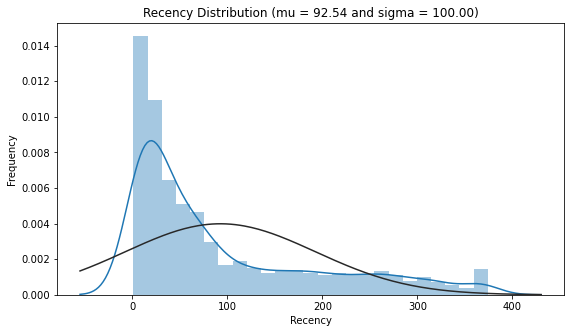

In [23]:
# Get the fitted parameters (mu and sigma) for the normal distribution
(mu, sigma) = norm.fit(customer_history_df['recency'])


# Create a figure and subplot for the distribution plot
fig1 = plt.figure().add_subplot(121)

# Plot the kernel density plot with the fitted normal distribution
sns.distplot(customer_history_df['recency'], fit=norm)

# Set the title, x-axis label, and y-axis label
fig1.set_title('Recency Distribution (mu = {:.2f} and sigma = {:.2f})'.format(mu, sigma), loc='center')
fig1.set_xlabel('Recency')
fig1.set_ylabel('Frequency')

# Display the plot
plt.show()


## FREQUENCY
Frequency helps us to know how many times a customer purchased from us. To do that we need to check how many invoices are registered by the same customer.

In [24]:
customer_freq = (df[['CustomerID', 'InvoiceNo']].groupby(["CustomerID", 'InvoiceNo']).count().reset_index()).\
               groupby(["CustomerID"]).count().reset_index()
customer_freq.rename(columns={'InvoiceNo':'frequency'},inplace=True)
customer_history_df = customer_history_df.merge(customer_freq)
customer_history_df.rename(columns={'InvoiceNo':'frequency'},inplace=True)
customer_history_df


,CustomerID,recency,frequency
0,12346.0,326.0,1
1,12347.0,2.0,7
2,12348.0,75.0,4
3,12349.0,19.0,1
4,12350.0,310.0,1
...,...,...,...
4333,18280.0,278.0,1
4334,18281.0,181.0,1
4335,18282.0,8.0,2
4336,18283.0,4.0,16


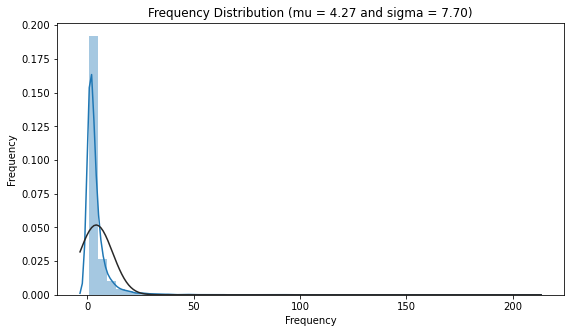

In [25]:
# Get the fitted parameters (mu and sigma) for the normal distribution
(mu, sigma) = norm.fit(customer_history_df['frequency'])

# Create a figure and subplot for the distribution plot
fig1 = plt.figure().add_subplot(121)

# Plot the kernel density plot with the fitted normal distribution
sns.distplot(customer_history_df['frequency'], fit=norm)

# Set the title, x-axis label, and y-axis label
fig1.set_title('Frequency Distribution (mu = {:.2f} and sigma = {:.2f})'.format(mu, sigma), loc='center')
fig1.set_xlabel('Frequency')
fig1.set_ylabel('Frequency')

# Display the plot
plt.show()

## MONETARY
Monetary attribute answers the question: How much money did the customer spent over time?

In [26]:
customer_history_df = customer_history_df.merge(df[['CustomerID','Amount']].groupby("CustomerID").sum().reset_index())
customer_history_df.rename(columns={'Amount':'monetary'},inplace=True)
customer_history_df

,CustomerID,recency,frequency,monetary
0,12346.0,326.0,1,77183.60
1,12347.0,2.0,7,4310.00
2,12348.0,75.0,4,1797.24
3,12349.0,19.0,1,1757.55
4,12350.0,310.0,1,334.40
...,...,...,...,...
4333,18280.0,278.0,1,180.60
4334,18281.0,181.0,1,80.82
4335,18282.0,8.0,2,178.05
4336,18283.0,4.0,16,2094.88


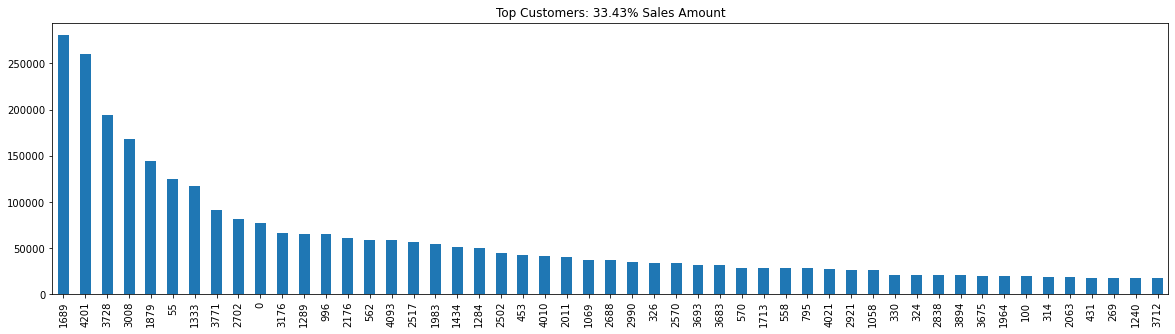

In [27]:
PercentSales = np.round((agg.amount_sum.sort_values(ascending=False)[:51].sum() / agg.amount_sum.sum().sum()) * 100, 2)

# Create the bar plot for the top 51 customers
g = agg.amount_sum.sort_values(ascending=False)[:51].plot(kind='bar', title='Top Customers: {:3.2f}% Sales Amount'.format(PercentSales))

plt.show()

In [28]:
plt.savefig("Monetary.png")

<Figure size 1440x360 with 0 Axes>

In [29]:
customer_history_df.describe()

,CustomerID,recency,frequency,monetary
count,4338.000000,4338.000000,4338.000000,4338.000000
mean,15300.408022,92.536422,4.272015,2054.266460
std,1721.808492,100.014169,7.697998,8989.230441
min,12346.000000,1.000000,1.000000,3.750000
25%,13813.250000,18.000000,1.000000,307.415000
50%,15299.500000,51.000000,2.000000,674.485000
75%,16778.750000,142.000000,5.000000,1661.740000
max,18287.000000,374.000000,209.000000,280206.020000


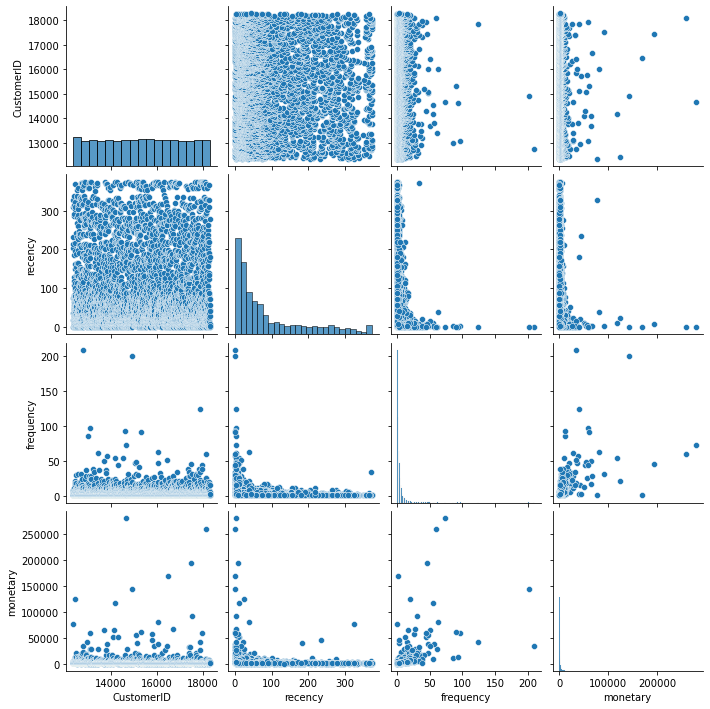

In [31]:
# Create a pair plot of the DataFrame
sns.pairplot(customer_history_df)

# Display the plot
plt.show()


## RFM Table Correctness Verification

In [32]:
df[df['CustomerID']==12346.0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Amount,InvoiceDate_year,InvoiceDate_month,days_since_last_purchase
61619,541431,23166,MEDIUM CERAMIC TOP STORAGE JAR,74215,2011-01-18 10:01:00,1.04,12346.0,United Kingdom,77183.6,2011,1,326.0


***As we can see our RFM table is correct. The first customer bought only once, and only one product with huge amount***

## Applying RFM score formula

The simplest way to create customers segments from RFM Model is to use Quartiles. We assign a score from 1 to 4 to Recency, Frequency and Monetary. Four is the best/highest value, and one is the lowest/worst value. A final RFM score is calculated simply by combining individual RFM score numbers.

Note: Quintiles (score from 1-5) offer better granularity, in case the business needs that but it will be more challenging to create segments since we will have 555 possible combinations. So, we will use quartiles.

In [34]:
#We create two classes for the RFM segmentation since, being high recency is bad, while high frequency and monetary value is good.

quantiles = customer_history_df.quantile(q=[0.25,0.5,0.75])
quantiles = quantiles.to_dict()
def RScore(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

def FMScore(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
customer_history_df['R'] = customer_history_df['recency'].apply(RScore, args=('recency',quantiles,))
customer_history_df['F'] = customer_history_df['frequency'].apply(FMScore, args=('frequency',quantiles,))
customer_history_df['M'] = customer_history_df['monetary'].apply(FMScore, args=('monetary',quantiles,))

## Calculate RFM_Score

In [35]:

customer_history_df['RFM_Score'] = customer_history_df.R.map(str) \
                            + customer_history_df.F.map(str) \
                            + customer_history_df.M.map(str)
customer_history_df
     

,CustomerID,recency,frequency,monetary,R,F,M,RFM_Score
0,12346.0,326.0,1,77183.60,1,1,4,114
1,12347.0,2.0,7,4310.00,4,4,4,444
2,12348.0,75.0,4,1797.24,2,3,4,234
3,12349.0,19.0,1,1757.55,3,1,4,314
4,12350.0,310.0,1,334.40,1,1,2,112
...,...,...,...,...,...,...,...,...
4333,18280.0,278.0,1,180.60,1,1,1,111
4334,18281.0,181.0,1,80.82,1,1,1,111
4335,18282.0,8.0,2,178.05,4,2,1,421
4336,18283.0,4.0,16,2094.88,4,4,4,444


In [36]:
customer_history_df[customer_history_df['RFM_Score']=='444'].sort_values('monetary', ascending=False).head(10)

,CustomerID,recency,frequency,monetary,R,F,M,RFM_Score
1689,14646.0,2.0,73,280206.02,4,4,4,444
4201,18102.0,1.0,60,259657.30,4,4,4,444
3728,17450.0,8.0,46,194550.79,4,4,4,444
1879,14911.0,1.0,201,143825.06,4,4,4,444
1333,14156.0,10.0,55,117379.63,4,4,4,444
3771,17511.0,3.0,31,91062.38,4,4,4,444
3176,16684.0,4.0,28,66653.56,4,4,4,444
1289,14096.0,4.0,17,65164.79,4,4,4,444
996,13694.0,4.0,50,65039.62,4,4,4,444
2176,15311.0,1.0,91,60767.90,4,4,4,444


In [37]:
customer_history_df['RFM_Score'] = customer_history_df['RFM_Score'].astype(int)

In [38]:
def cust_seg(RFM_Score):
    if RFM_Score >= 444:
        return 'Platinum Customer'
    elif RFM_Score >= 433 and RFM_Score < 444:
        return 'Very Loyal'
    elif RFM_Score >= 421 and RFM_Score < 433:
        return 'Becoming Loyal'
    elif RFM_Score >= 344 and RFM_Score < 421:
        return 'Recent Customer'
    elif RFM_Score >= 323 and RFM_Score < 344:
        return 'Potential Customer'
    elif RFM_Score >= 311 and RFM_Score < 323:
        return 'Late Bloomer'
    elif RFM_Score >= 224 and RFM_Score < 311:
        return 'Losing Customer'
    elif RFM_Score >= 212 and RFM_Score < 224:
        return 'High-Risk Customer'
    elif RFM_Score >= 124 and RFM_Score < 212:
        return 'Almost Lost Customer'
    elif RFM_Score >= 112 and RFM_Score < 124:
        return 'Evasive Customer'
    else:
        return 'Lost Customer'

In [39]:
customer_history_df['Segment'] = customer_history_df['RFM_Score'].apply(cust_seg)

In [40]:
customer_history_df.head()

,CustomerID,recency,frequency,monetary,R,F,M,RFM_Score,Segment
0,12346.0,326.0,1,77183.60,1,1,4,114,Evasive Customer
1,12347.0,2.0,7,4310.00,4,4,4,444,Platinum Customer
2,12348.0,75.0,4,1797.24,2,3,4,234,Losing Customer
3,12349.0,19.0,1,1757.55,3,1,4,314,Late Bloomer
4,12350.0,310.0,1,334.40,1,1,2,112,Evasive Customer


## How many customers do we have in each segment?

In [41]:
# Count the number of customers in each segment
segment_counts = customer_history_df['Segment'].value_counts()
segment_counts

Evasive Customer        492
Potential Customer      480
Platinum Customer       462
Lost Customer           443
Losing Customer         434
High-Risk Customer      425
Late Bloomer            401
Almost Lost Customer    356
Very Loyal              334
Recent Customer         285
Becoming Loyal          226
Name: Segment, dtype: int64

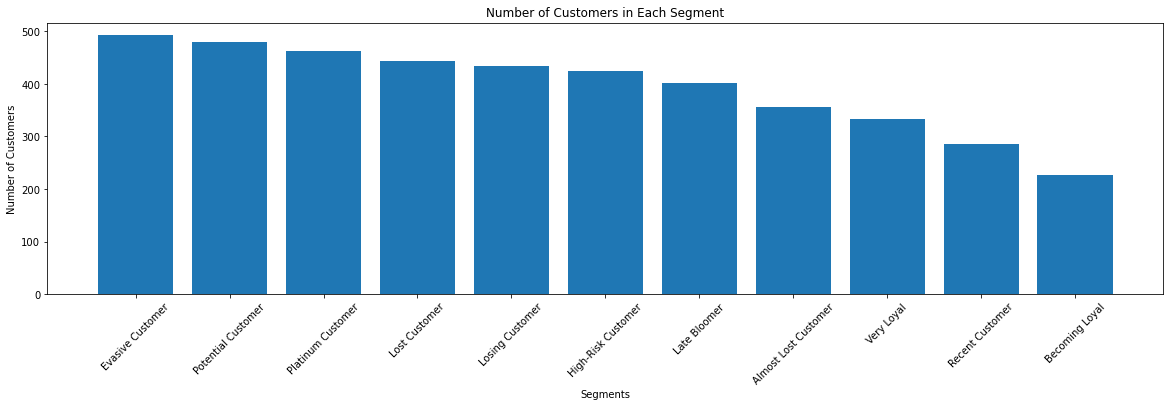

In [42]:
# Create the bar plot
# Define custom colors for the bars
plt.bar(segment_counts.index, segment_counts.values)
plt.xlabel('Segments')
plt.ylabel('Number of Customers')
plt.title('Number of Customers in Each Segment')
# Rotate the x-axis labels if needed
plt.xticks(rotation=45)
plt.show()

***Now that we knew our customers segments we can choose how to target or deal with each segment***

***For example:***

***Best Customers - Platinum Customer: Reward them. They can be early adopters to new products. Suggest them "Refer a friend".***

***At Risk: Send them personalized emails to encourage them to shop.***

In [43]:
customer_history_df.to_csv('Customer_RFM_Analysis.csv', index=False)

In [44]:
categorical_cols = ['Country','InvoiceDate_year','InvoiceDate_month']
year_col= ['InvoiceDate_year','InvoiceDate_month','Amount']
year_analysis= df[year_col]

In [45]:
#for seasonal and yearly(peak sale months) analysis
year_analysis.groupby(['InvoiceDate_year','InvoiceDate_month']).sum('Amount')

Amount
InvoiceDate_year InvoiceDate_month             
2010             12                  572713.890
2011             1                   569445.040
                 2                   447137.350
                 3                   595500.760
                 4                   469200.361
                 5                   678594.560
                 6                   661213.690
                 7                   600091.011
                 8                   645343.900
                 9                   952838.382
                 10                 1039318.790
                 11                 1161817.380
                 12                  518192.790

In [46]:
year_analysis.to_csv('yearly_analysis.csv')

#### COUNTRY WISE SALES REVENUE ANALYSIS

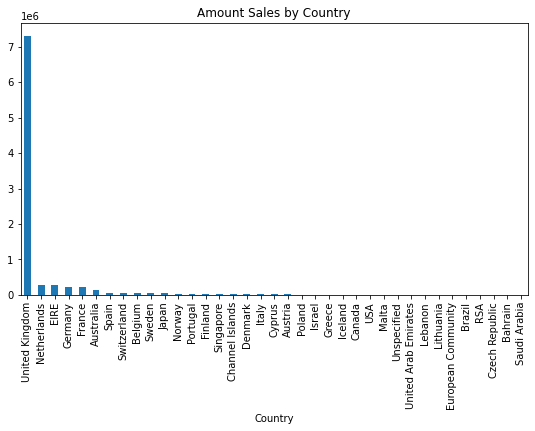

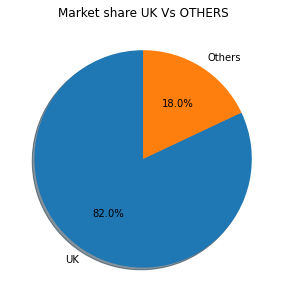

In [47]:
# Create the first subplot for the bar plot
f1 = plt.figure().add_subplot(121)

# Group the data by country and calculate the sum of sales amount
sales_by_country = df.groupby("Country")['Amount'].sum().sort_values(ascending=False)

# Plot the bar chart
g = sales_by_country.plot(kind='bar', title='Amount Sales by Country')

# Create the second subplot for the pie chart
f2 = plt.figure().add_subplot(122)

# Create a new column to categorize UK and others for market share
df['Max_to_total_marketshare'] = df.Country.apply(lambda x: 'UK' if x == 'United Kingdom' else 'Others')

# Group the data by market share category and calculate the sum of sales amount
market_share = df.groupby("Max_to_total_marketshare").Amount.sum().sort_values(ascending=False)

# Plot the pie chart
g = plt.pie(market_share, labels=market_share.index, autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('Market share UK Vs OTHERS')

# Display the plots
plt.show()


In [48]:
plt.savefig("Market.png")

<Figure size 1440x360 with 0 Axes>

## TOP SOLD(POPULAR) PRODUCTS: 
Any order placed for any product is confirmed by the Unique Invoice for every new order

In [49]:
product = df[["Description", "InvoiceNo"]].groupby(["Description"]).InvoiceNo.unique().agg(np.size).sort_values(ascending = False)

In [50]:
AmountSum = df.groupby(["Description"]).Amount.sum().sort_values(ascending = False)

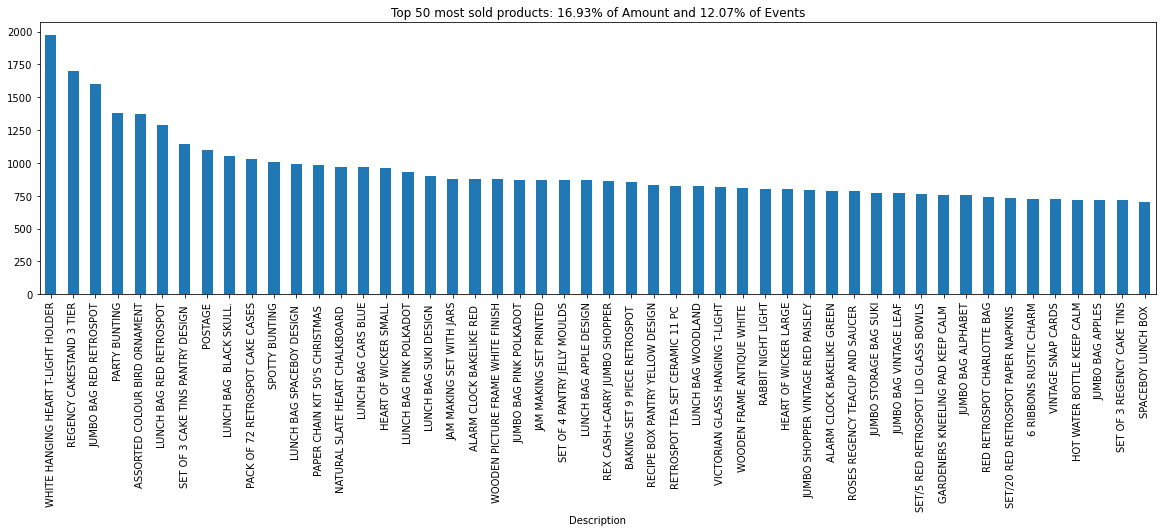

In [51]:
fig = plt.figure()

# Select the top 50 products
Top50products = list(product[:50].index)

# Calculate the percentage of revenue and events for the top 50 products
Percent_By_revenue = np.round((AmountSum[Top50products].sum() / AmountSum.sum()) * 100, 2)
Percent_by_event = np.round((product[Top50products].sum() / product.sum()) * 100, 2)

# Plot the bar chart
g = product[Top50products].plot(kind='bar', title='Top 50 most sold products: {:3.2f}% of Amount and {:3.2f}% of Events'.format(Percent_By_revenue, Percent_by_event))

plt.show()


In [52]:
plt.savefig("Product_Event.png")

<Figure size 1440x360 with 0 Axes>

#### TOP REVENUE GENERATING PRODUCTS: 
A function of unitprice and the quantity of each order.

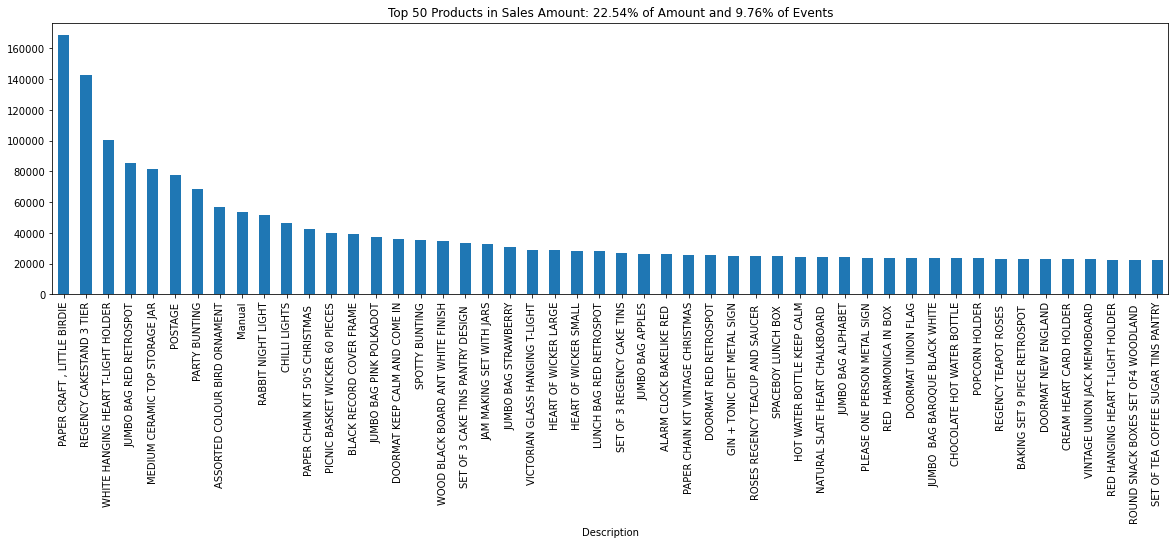

In [53]:
fig = plt.figure()

# Select the top 50 products based on sales amount
Top50products = list(AmountSum[:50].index)

# Calculate the percentage of revenue and events for the top 50 products
Percent_by_revenue = np.round((AmountSum[Top50products].sum() / AmountSum.sum()) * 100, 2)
Percent_by_events = np.round((product[Top50products].sum() / product.sum()) * 100, 2)

# Plot the bar chart
g = AmountSum[Top50products].plot(kind='bar', 
         title='Top 50 Products in Sales Amount: {:3.2f}% of Amount and {:3.2f}% of Events'.format(Percent_by_revenue, Percent_by_events))

plt.show()


In [ ]:
plt.savefig("Product_revenue.png")